## 데이터 분석에 필요한 라이브러리

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix


## 아이리스 꽃 데이터 불러오기

In [ ]:
iris = datasets.load_iris()

## 불러온 데이터 시각화

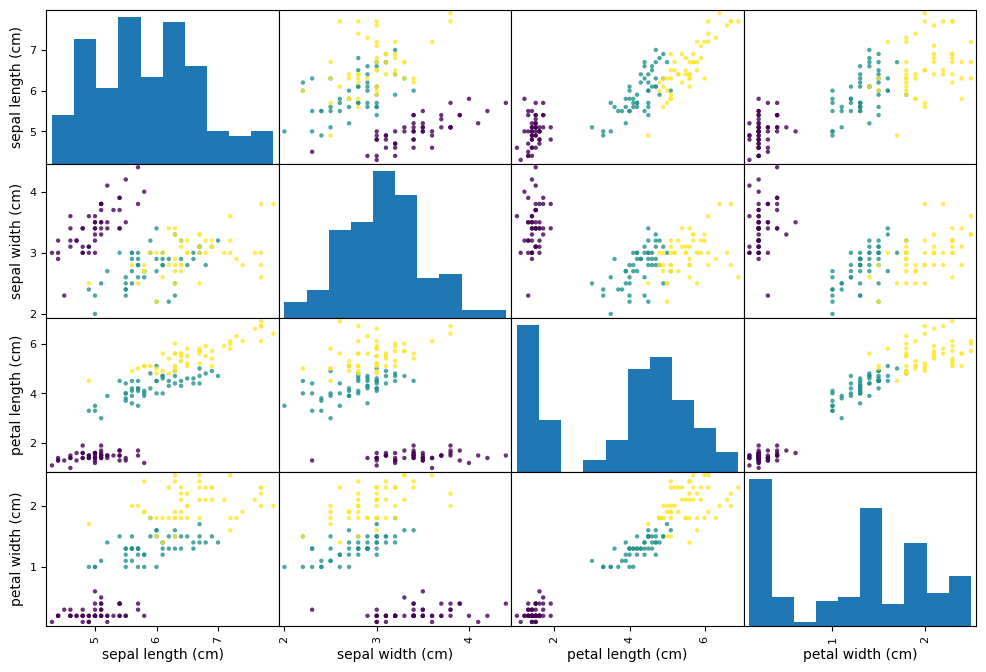

In [24]:
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
scatter_matrix(dataframe, c=iris['target'],marker='o', s=10,alpha=.8, figsize=(12,8))
plt.show()

## 독립변수와 종속변수 확인

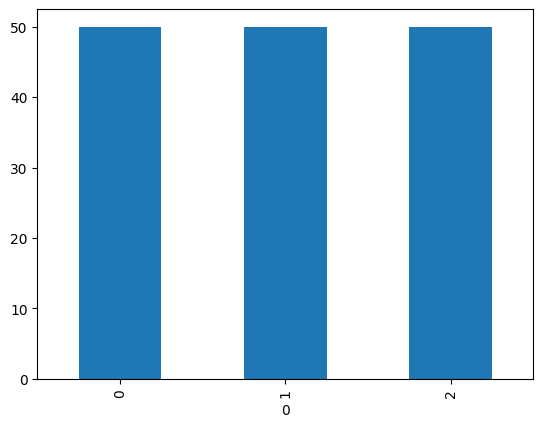

In [25]:
# 독립변수와 종속변수 확인
X = iris.data
y = iris.target
feature_names = iris.feature_names

df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

/var/folders/2g/_qvnw5fd077cmtw3_jxq2yd40000gn/T/ipykernel_82708/2840604200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X[i])


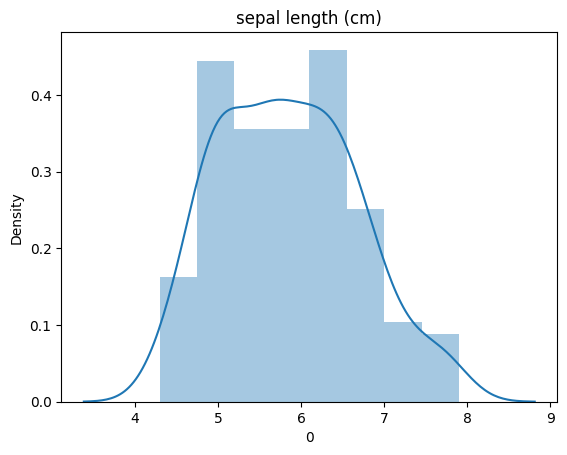

/var/folders/2g/_qvnw5fd077cmtw3_jxq2yd40000gn/T/ipykernel_82708/2840604200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X[i])


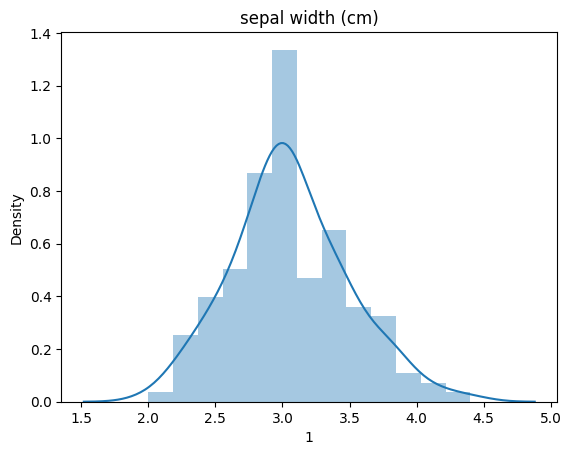

/var/folders/2g/_qvnw5fd077cmtw3_jxq2yd40000gn/T/ipykernel_82708/2840604200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X[i])


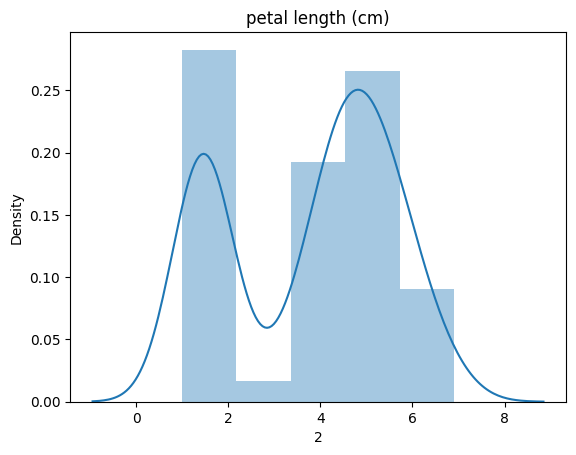

/var/folders/2g/_qvnw5fd077cmtw3_jxq2yd40000gn/T/ipykernel_82708/2840604200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X[i])


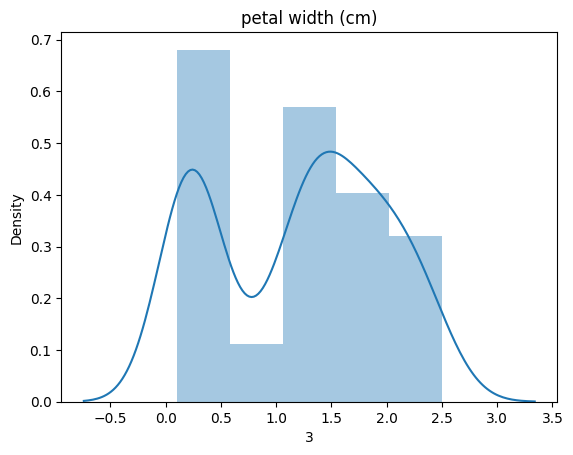

In [26]:
import seaborn as sns
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

## 주성분 분석

In [27]:
pca = PCA()
pca.fit(X)
PC_score = pca.transform(X)
PC_score[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [28]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

## PC 값의 설명력 정도 구하기

In [29]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [30]:
ratio = pca.explained_variance_ratio_
ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

,V_ration
PC1,0.924619
PC2,0.053066
PC3,0.017103
PC4,0.005212


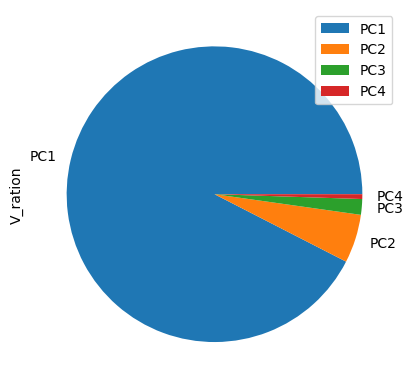

In [31]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

## PCA 분석 결과 확인

Text(0.5, 1.0, 'PCA of IRIS dataset')

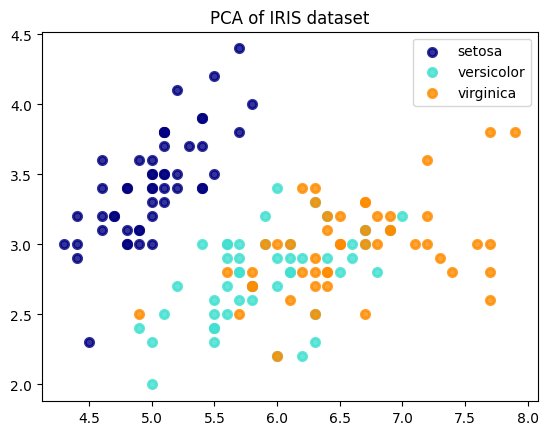

In [32]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

## PCA 결과를 따른 데이터 분포 확인

Text(0.5, 1.0, 'PCA of IRIS dataset')

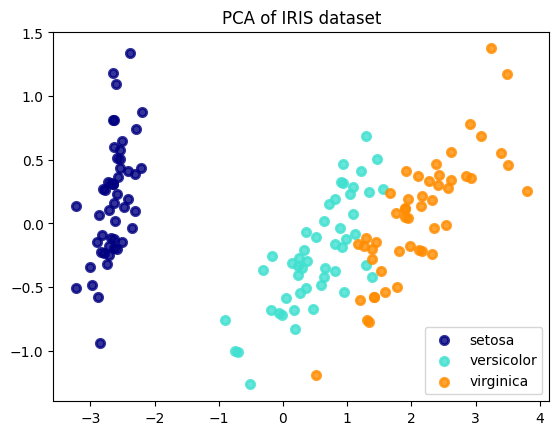

In [33]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(PC_score[y == i, 0], PC_score[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [35]:
clf = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf.fit(X,y)
pred = clf.predict(X)
confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [36]:
clf = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf.fit(X[:,:2],y)
pred = clf.predict(X[:,:2])
confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]])

In [37]:
clf2 = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf2.fit(PC_score[:,:2],y)
pred = clf2.predict(PC_score[:,:2])
confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])